In [339]:
import pandas as pd
import warnings
from sklearn.metrics.pairwise import cosine_similarity
import tensorflow_hub as hub
import tensorflow_text as txt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

warnings.filterwarnings('ignore')

<h1>Preprocessing Data</h1>

In [23]:
#data = pd.read_csv('Amazon_Consumer_Reviews.csv')
data = pd.read_csv('Amazon_Consumer_Reviews.csv')
reviews = data[['reviews.text', 'reviews.rating']]
reviews.columns = ['text', 'rating']

In [33]:
reviews.isna().sum()

text      0
rating    0
dtype: int64

Rating count:  {5: 3478, 4: 1208, 3: 197, 1: 63, 2: 54}


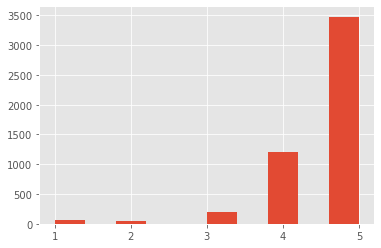

In [34]:
print('Rating count: ', reviews.rating.value_counts().to_dict())

reviews.rating.hist()
plt.xticks([1,2,3,4,5])
plt.show()

In [35]:
#Handling data imbalance
pos = reviews[reviews['rating'] == 5].reset_index(drop=True)
neg = reviews[reviews['rating'].isin([1,2,3])].reset_index(drop=True)

pos['rating'] = 1
neg['rating'] = 0

print('Positive reviews (1): ', pos.shape[0], '| Negative reviews (0): ', neg.shape[0])

pos_sample = pos.sample(neg.shape[0]).reset_index(drop=True)

reviews = pd.concat([pos_sample,neg])

print('Ratings after sampling')
reviews.rating.value_counts()

Positive reviews (1):  3478 | Negative reviews (0):  314
Ratings after sampling


1    314
0    314
Name: rating, dtype: int64

In [36]:
reviews.sample(5)

,text,rating
183,"Super slow, not of decent quality.I would not ...",0
98,Tablet works will with Amazon video on our sma...,1
313,Never without my Amazon HD 8 - great for readi...,1
303,This is not an upgrade by any means! My three ...,0
99,So slow returning mine for something different...,0


<h1>Predictions on baseline models (with CountVectorizer)</h1>

In [37]:
model_performance = pd.DataFrame(columns= ['Model', 'Accuracy'])

In [38]:
def make_prediction(text, labels, vectorizer, model):
    vectorized_text = vectorizer.fit_transform(text)
    X = vectorized_text
    y = reviews.rating.values
    x_train, x_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.15, random_state=0)
    model.fit(x_train, y_train)
    yhat = model.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, yhat))
    return accuracy_score(y_test, yhat)

In [39]:
print('Model: Logistic Regression')
model = 'LogisticRegression'
accuracy = make_prediction(reviews.text,reviews.rating, CountVectorizer(stop_words='english'), LogisticRegression())
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Logistic Regression
Accuracy:  0.8736842105263158


In [40]:
print('Model: K nearest neighbors classifier')
model = 'KNN'
accuracy = make_prediction(reviews.text,reviews.rating, CountVectorizer(stop_words='english'), KNeighborsClassifier(n_neighbors=5))
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: K nearest neighbors classifier
Accuracy:  0.6631578947368421


In [41]:
print('Model: Decision Tree')
model = 'DecisionTree'
accuracy = make_prediction(reviews.text,reviews.rating, CountVectorizer(stop_words='english'), DecisionTreeClassifier(random_state=0))
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Decision Tree
Accuracy:  0.7684210526315789


In [42]:
print('Model: Gaussian Naive Bays')
model= 'GaussianNB'
accuracy = make_prediction(reviews.text,reviews.rating, CountVectorizer(stop_words='english'), GaussianNB())
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Gaussian Naive Bays
Accuracy:  0.6421052631578947


In [43]:
print('Model: Support Vector Classifier')
model = 'SVC'
accuracy = make_prediction(reviews.text,reviews.rating, CountVectorizer(stop_words='english'), SVC(gamma='auto'))
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Support Vector Classifier
Accuracy:  0.49473684210526314


In [44]:
cv_performance = model_performance.copy().sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

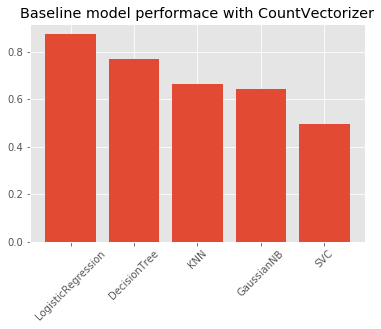

In [45]:
model_performance = model_performance.sort_values(by='Accuracy', ascending=False)
plt.bar(x=model_performance['Model'], height=model_performance['Accuracy'])
plt.title('Baseline model performace with CountVectorizer')
plt.xticks(rotation=45);

<h1>Predictions on baseline models (with TF-IDF Vectorizer)</h1>

In [69]:
model_performance = pd.DataFrame(columns= ['Model', 'Accuracy'])

In [70]:
print('Model: Logistic Regression')
model = 'LogisticRegression'
accuracy = make_prediction(reviews.text,reviews.rating, TfidfVectorizer(stop_words='english', ngram_range=(1, 2)), LogisticRegression())
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Logistic Regression
Accuracy:  0.8842105263157894


In [71]:
print('Model: K nearest neighbors classifier')
model = 'KNN'
accuracy = make_prediction(reviews.text,reviews.rating, TfidfVectorizer(stop_words='english', ngram_range=(1, 2)), KNeighborsClassifier(n_neighbors=5))
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: K nearest neighbors classifier
Accuracy:  0.6842105263157895


In [72]:
print('Model: Decision Tree')
model = 'DecisionTree'
accuracy = make_prediction(reviews.text,reviews.rating, TfidfVectorizer(stop_words='english', ngram_range=(1, 2)), DecisionTreeClassifier(random_state=0))
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Decision Tree
Accuracy:  0.8421052631578947


In [73]:
print('Model: Gaussian Naive Bays')
model= 'GaussianNB'
accuracy = make_prediction(reviews.text,reviews.rating, TfidfVectorizer(stop_words='english', ngram_range=(1, 2)), GaussianNB())
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Gaussian Naive Bays
Accuracy:  0.6842105263157895


In [74]:
print('Model: Support Vector Classifier')
model = 'SVC'
accuracy = make_prediction(reviews.text,reviews.rating, TfidfVectorizer(stop_words='english', ngram_range=(1, 2)), SVC(gamma='auto'))
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Support Vector Classifier
Accuracy:  0.49473684210526314


In [75]:
tfidf_performance = model_performance.copy().sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

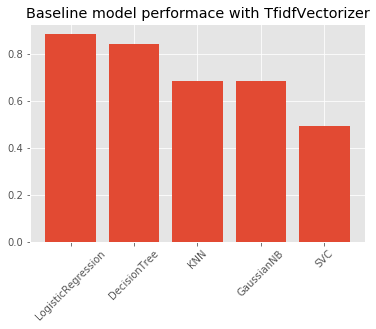

In [76]:
model_performance = model_performance.sort_values(by='Accuracy', ascending=False)
plt.bar(x=model_performance['Model'], height=model_performance['Accuracy'])
plt.title('Baseline model performace with TfidfVectorizer')
plt.xticks(rotation=45);

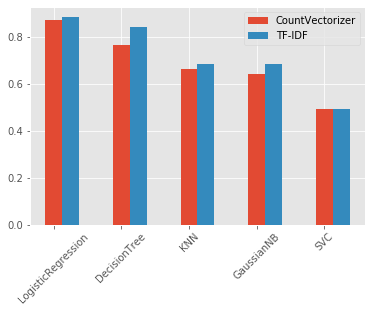

In [77]:
plt.bar(x=range(cv_performance.shape[0]), height=cv_performance['Accuracy'], width=0.25, label='CountVectorizer')
plt.bar(x=np.array(range(tfidf_performance.shape[0]))+0.25, height=tfidf_performance['Accuracy'], width=0.25, label='TF-IDF')
plt.xticks(range(cv_performance.shape[0]), cv_performance['Model'], rotation=45)
plt.legend();

In [78]:
if tfidf_performance['Accuracy'].loc[0] > cv_performance['Accuracy'].loc[0]:
    best = tfidf_performance.copy()
else:
    best = cv_performance.copy()

In [80]:
print('Model performs relatively better on TF-IDF vectorizer')
print(f'Best performing baseline model: {best.loc[0].values[0]}, Accuracy: {best.loc[0].values[1]}')

Model performs relatively better on TF-IDF vectorizer
Best performing baseline model: LogisticRegression, Accuracy: 0.8842105263157894


<h1>Hyperparameter tuning to optimize models</h1>

In [81]:
model_performance = pd.DataFrame(columns= ['Model', 'Accuracy'])

In [82]:
def optimize_model(text, labels, model, parameters):
    vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
    vectorized_text = vectorizer.fit_transform(text)
    X = vectorized_text
    y = labels
    x_train, x_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.15, random_state=0)
    clf = GridSearchCV(model, parameters)
    clf.fit(x_train, y_train)
    yhat = clf.predict(x_test)
    print('Accuracy: ', accuracy_score(y_test, yhat))
    return accuracy_score(y_test, yhat)

In [83]:
model = 'LogisticRegression'
print(model)
accuracy = optimize_model(reviews.text, reviews.rating.values, LogisticRegression(), {'penalty': ['l2'], 'C': [100, 10, 1.0, 0.1, 0.01]})
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

LogisticRegression
Accuracy:  0.9052631578947369


In [84]:
model = 'KNN'
print(model)
accuracy = optimize_model(reviews.text, reviews.rating.values, KNeighborsClassifier(), {'n_neighbors': range(1, 21, 2), 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan', 'minkowski']})
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

KNN
Accuracy:  0.7789473684210526


In [85]:
model = 'DecisionTree'
print(model)
accuracy = optimize_model(reviews.text, reviews.rating.values, DecisionTreeClassifier(random_state=0), {'criterion':('gini', 'entropy')})
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

DecisionTree
Accuracy:  0.8421052631578947


In [86]:
print('Model: Gaussian Naive Bays')
model= 'GaussianNB'
accuracy = optimize_model(reviews.text, reviews.rating.values, GaussianNB(), {'var_smoothing': np.logspace(0,-9, num=100)})
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

Model: Gaussian Naive Bays
Accuracy:  0.7052631578947368


In [87]:
model = 'SVC'
print(model)
accuracy = optimize_model(reviews.text, reviews.rating.values, SVC(), {'kernel':('linear', 'rbf'), 'C':[1, 10]})
model_performance = model_performance.append({'Model': model, 'Accuracy': accuracy}, ignore_index=True)

SVC
Accuracy:  0.8842105263157894


In [88]:
optimized_performance = model_performance.copy()

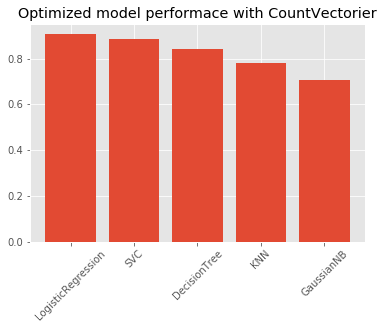

In [89]:
optimized_performance = optimized_performance.sort_values(by='Accuracy', ascending=False)
plt.bar(x=optimized_performance['Model'], height=optimized_performance['Accuracy'])
plt.title('Optimized model performace with CountVectorier')
plt.xticks(rotation=45);

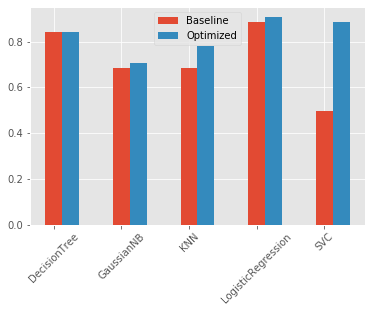

In [90]:
optimized_performance = optimized_performance.sort_values(by='Model')
best = best.sort_values(by='Model')
plt.bar(x=range(best.shape[0]), height=best['Accuracy'], width=0.25, label='Baseline')
plt.bar(x=np.array(range(optimized_performance.shape[0]))+0.25, height=optimized_performance['Accuracy'], width=0.25, label='Optimized')
plt.xticks(range(optimized_performance.shape[0]), optimized_performance['Model'], rotation=45)
plt.legend();

<b>Overall, optimized Logistic Regression model is the best model for intent classsification on given dataset<b>

In [91]:
optimized_performance = model_performance.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
print(f'Best performing baseline model: {optimized_performance.loc[0].values[0]}, Accuracy: {optimized_performance.loc[0].values[1]}')

Best performing baseline model: LogisticRegression, Accuracy: 0.9052631578947369


<h2>Deep Neural Network with Embedding</h2>

In [367]:
data = pd.read_csv('Amazon_Consumer_Reviews_of_Amazon_Products.csv')
reviews = data[['reviews.text', 'reviews.rating']]
reviews.columns = ['text', 'rating']

In [368]:
#Handling data imbalance
pos = reviews[reviews['rating'] == 5].reset_index(drop=True)
neg = reviews[reviews['rating'].isin([1,2,3])].reset_index(drop=True)

pos['rating'] = 1
neg['rating'] = 0

print('Positive reviews (1): ', pos.shape[0], '| Negative reviews (0): ', neg.shape[0])

pos_sample = pos.sample(neg.shape[0]).reset_index(drop=True)

reviews = pd.concat([pos_sample,neg])

print('Ratings after sampling')
reviews.rating.value_counts()

Positive reviews (1):  19897 | Negative reviews (0):  2787
Ratings after sampling


1    2787
0    2787
Name: rating, dtype: int64

In [369]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [370]:
X = reviews['text'].map(lambda x: one_hot(x, 10000, lower=True)).values
y = reviews['rating'].values
df = pd.DataFrame([X,y]).T
df.columns = ['text', 'rating']
X = pad_sequences(df['text'].values).astype(float)
y = df['rating'].values.astype(float)

In [371]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [372]:
model = keras.Sequential()
model.add(keras.layers.Embedding(10000, 128, input_length = x_train.shape[1]))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(128, return_sequences = True)))
model.add(keras.layers.Bidirectional(keras.layers.LSTM(64)))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [373]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [374]:
epochs = 5
checkpoint_filepath = './tmp/checkpoint'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs, verbose=1, validation_data=(x_test, y_test), callbacks=[model_checkpoint_callback])

Epoch 1/5
149/149 [==============================] - 472s 3s/step - loss: 0.5392 - accuracy: 0.7102 - val_loss: 0.6791 - val_accuracy: 0.5890
Epoch 2/5
149/149 [==============================] - 414s 3s/step - loss: 0.3630 - accuracy: 0.8507 - val_loss: 0.3432 - val_accuracy: 0.8698
Epoch 3/5
149/149 [==============================] - 416s 3s/step - loss: 0.2277 - accuracy: 0.9246 - val_loss: 0.3440 - val_accuracy: 0.8722
Epoch 4/5
149/149 [==============================] - 368s 2s/step - loss: 0.1567 - accuracy: 0.9510 - val_loss: 0.3898 - val_accuracy: 0.8877
Epoch 5/5
149/149 [==============================] - 393s 3s/step - loss: 0.1205 - accuracy: 0.9597 - val_loss: 0.4255 - val_accuracy: 0.8686


Text(0.5, 1.0, 'loss')

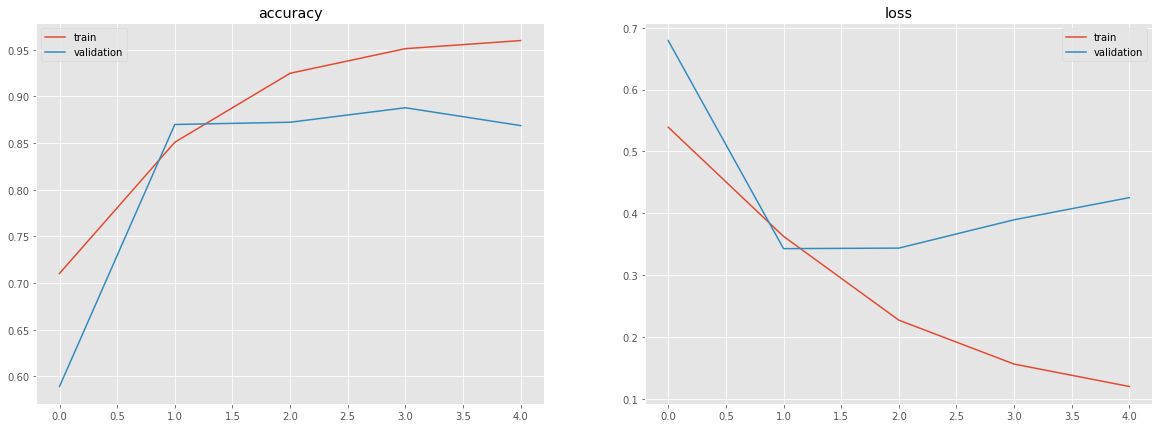

In [375]:
plt.figure(figsize=(20,7))

plt.subplot(1,2,1)
plt.plot(range(epochs), history.history['accuracy'], label='train')
plt.plot(range(epochs), history.history['val_accuracy'], label='validation')
plt.legend()
plt.title('accuracy')

plt.subplot(1,2,2)
plt.plot(range(epochs), history.history['loss'], label='train')
plt.plot(range(epochs), history.history['val_loss'], label='validation')
plt.legend()
plt.title('loss')

<b>Model starts to overfit after second epoch since validation loss start to increase while training loss continues to decrease.</b>

In [386]:
model.load_weights(checkpoint_filepath)

In [387]:
yhat = model.predict(x_test)
print('Neural Netork accuracy on test dataset: ', model.evaluate(x_test, y_test, verbose=0)[1])

Neural Netork accuracy on test dataset:  0.8876941204071045


In [388]:
print('Neural Netork accuracy on train dataset: ', model.evaluate(x_train, y_train, verbose=0)[1])

Neural Netork accuracy on train dataset:  0.971712052822113


<h1>Transfer Learning (BERT)</h1>

<h2>Preprocess text</h2>

In [389]:
data = pd.read_csv('Amazon_Consumer_Reviews.csv')
reviews = data[['reviews.text', 'reviews.rating']]
reviews.columns = ['text', 'rating']

In [390]:
#Handling data imbalance
pos = reviews[reviews['rating'] == 5].reset_index(drop=True)
neg = reviews[reviews['rating'].isin([1,2,3])].reset_index(drop=True)

pos['rating'] = 1
neg['rating'] = 0

print('Positive reviews (1): ', pos.shape[0], '| Negative reviews (0): ', neg.shape[0])

pos_sample = pos.sample(neg.shape[0]).reset_index(drop=True)

reviews = pd.concat([pos_sample,neg])

print('Ratings after sampling')
reviews.rating.value_counts()

Positive reviews (1):  3478 | Negative reviews (0):  314
Ratings after sampling


1    314
0    314
Name: rating, dtype: int64

In [391]:
pre_processor = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'
encoder = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'

In [392]:
preprocess = hub.KerasLayer(pre_processor)

In [393]:
preprocessed_text = preprocess(reviews.text)

In [394]:
encode = hub.KerasLayer(encoder)

In [395]:
bert_result = encode(preprocessed_text)

In [396]:
X = bert_result['pooled_output']
y = reviews.rating.values

In [397]:
x_train, x_test, y_train, y_test = train_test_split(X.numpy(), y, test_size=0.15, random_state=0)

In [398]:
model = LogisticRegression()
parameters = {'penalty': ['l1', 'l2'], 'C': [100, 10, 1.0, 0.1, 0.01]}

In [399]:
clf = GridSearchCV(model, parameters)
clf.fit(x_train, y_train)
yhat = clf.predict(x_test)
print('Accuracy: ', accuracy_score(y_test, yhat))

Accuracy:  0.8631578947368421


<b>Conclusion</b>

This study concludes that for given dataset Logistic Regression model with TF-IDF vectorizer is the best performing machine learning model with accuracy of 90.5%. Neural Network with Bidirections LSTM is the second best performing model with accuracy 88.7 %. Lastly, machine learning technique called Transfer Learning has been implemented using pre-trained BERT model on Logistic Regression. This model performace is relatively lower than earlier discussed model with accuracy of 86.3 %.